## The Sparks Foundation

##### Data Science and Business Analytics Internship (GRIP MAY 2021)

#### TASK 1-PREDICTION USING SUPERVISED LEARNING

#### Problem: Predict the score of a student based on the study hours.

##### By: ELSA PHILOMON


In [66]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [52]:
#importing dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [53]:
#printing dataset
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [54]:
#to print first five rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [55]:
#to print last five rows of the dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [56]:
#to get information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
#description of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [58]:
#to get number of rows and columns of the dataset
data.shape

(25, 2)

In [59]:
#to check if there is any null value in the dataset
data.isnull==True

False

There is no null value in the dataset

### Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

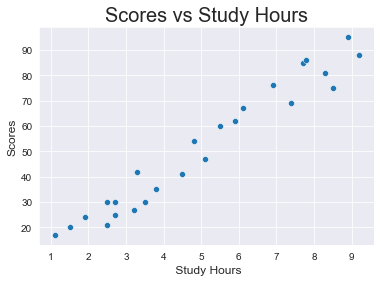

In [60]:
sn.set_style('darkgrid')
sn.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Scores vs Study Hours',size=20)
plt.ylabel('Scores',size=12)
plt.xlabel(' Study Hours',size=12)
plt.show

From the above scatterplot,we can find a positive linear correlation between the scores and study hours.

#### Now let's check the regression plot also.

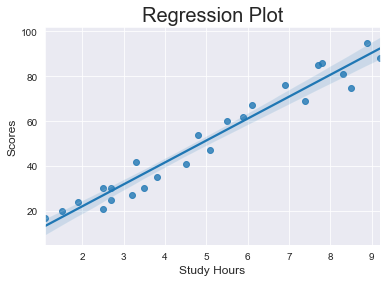

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [61]:
sn.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Regression Plot',size=20)
plt.xlabel('Study Hours',size=12)
plt.ylabel('Scores',size=12)
plt.show()
print(data.corr())

#### Now we can confirm the positive correlation

### Training the Model

#### Splitting the data

In [62]:
# Defining x and y from the data
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#Splitting the data into two
train_x, val_x, train_y, val_y = train_test_split(x,y, random_state =0)

#### Fitting the data into the model

In [63]:
regr= LinearRegression()
regr.fit(train_x, train_y)


LinearRegression()

#### Predicting the Scores

In [64]:
pred_y = regr.predict(val_x)
prediction=pd.DataFrame({'Hours':[i[0] for i in val_x], 'Predicted Scores': [k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#### Comparing the Predicted Score with the Actual Score

In [65]:
compare_scores = pd.DataFrame({'Actual Score': val_y, 'Predicted Score': pred_y})
compare_scores

,Actual Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#### Visual Comparison of the Predicted and Actual Scores

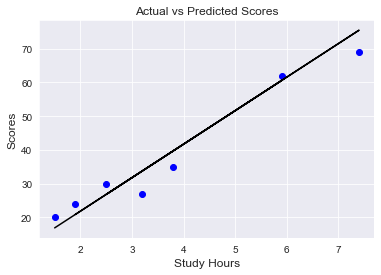

In [32]:
plt.scatter(x=val_x,y=val_y, color='blue')
plt.plot(val_x,pred_y, color='black')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Study Hours',size=12)
plt.ylabel('Scores',size=12)
plt.show()

### Evaluating the model

In [20]:
#Calcuating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


#### Small value of mean absolute error shows that the error is less and so, our model is good

### What will be the predicted score if a student studies for 9.25 hrs/day?

In [24]:
hours=[9.25]
answer=regr.predict([hours])
print("Score= {}".format(round(answer[0],3)))

Score= 93.893


### Conclusion
### If a student studies for 9.25 hours per day, he/she is likely to score 93.89 marks.  

### Thank you